In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
data.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [3]:
def func(r):
        if r ==6:
            return '2012'
        else : 
            return '2014'
        
data['Year']=data['year'].apply(func)



In [4]:
def func(g):
        if g ==1:
            return 'Male'
        else : 
            return 'Female'
        
data['gndr2']=data['gndr'].apply(func)


In [5]:
def func(p):
        if p ==1:
            return 'Lives with Partner'
        else : 
            return 'No Partner'
        
data['Partner']=data['partner'].apply(func)

#1 Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

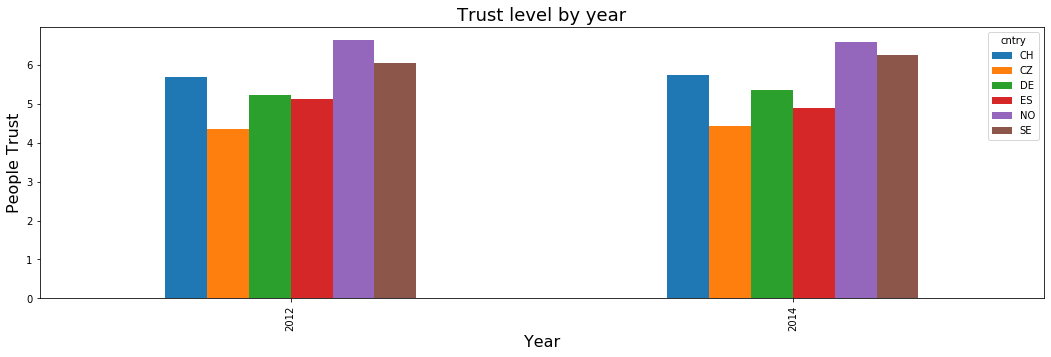

In [6]:
data.groupby(["Year",'cntry']).ppltrst.mean().unstack().plot(kind="bar", figsize=(18,5))
plt.xlabel("Year", fontsize=16)
plt.ylabel("People Trust", fontsize=16)
plt.title("Trust level by year", fontsize=18)
plt.show()

For most of the countries you can see that they actually go more trusting from 2012 to 2014, accept for ES(Spain) and NO (Norway) both look like they dipped slightly in 2014 from 2012. 

#2 Did people become happier from 2012 to 2014? Compute results for each country in the sample.

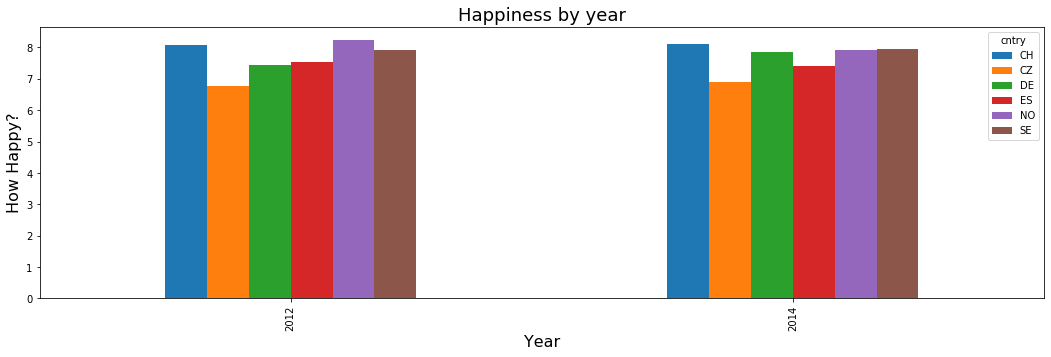

In [7]:
data.groupby(["Year",'cntry']).happy.mean().unstack().plot(kind="bar", figsize=(18,5))
plt.xlabel("Year", fontsize=16)
plt.ylabel("How Happy?", fontsize=16)
plt.title("Happiness by year", fontsize=18)
plt.show()

By looking at the graphs it looks like many of the countries saw a slight increase or remained the same from 2012 to 2014. However, NO(Norway) is lower, less happy, in 2014 then 2012. 

#3 Who reported watching more TV in 2012, men or women?

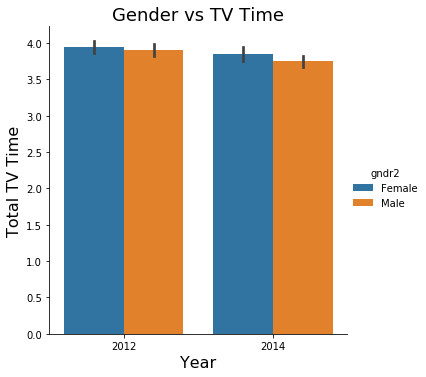

In [15]:
sns.catplot(x='Year',y='tvtot',hue='gndr2',kind='bar', data=data)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total TV Time", fontsize=16)
plt.title("Gender vs TV Time", fontsize=18)
plt.show()

Females watched more tv in both 2012 and 2014. 

#4 Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

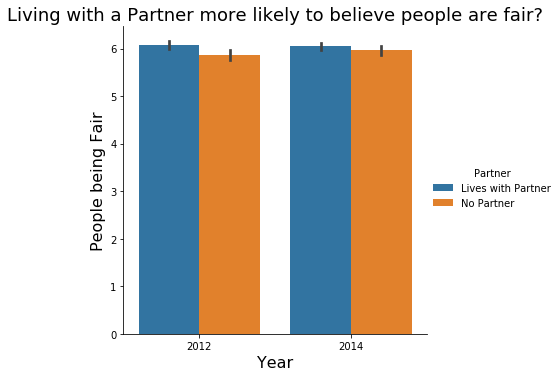

In [16]:
#2 bar graphs one for people living with and living without
sns.catplot(x='Year',y='pplfair',hue='Partner',kind='bar', data=data)
plt.xlabel("Year", fontsize=16)
plt.ylabel("People being Fair", fontsize=16)
plt.title("Living with a Partner more likely to believe people are fair?", fontsize=18)
plt.show()

People who live with their partners are shown to believe that people will are more likely to be fair then take advantage of youin both 2012 and 2014.

In [10]:
data2= data[data['cntry'].isin(['CZ','SE','NO'])]

In [11]:
def func(i):
        if i < 25:
            return 'Young'
        elif i > 50:
            return 'Old'
        else : 
            return 'Middle'
        
data2['Age_bins']=data['agea'].apply(func)
print(data2)

     cntry    idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
1546    CZ  1001.0     6    2.0     10.0      9.0     4.0    9.0      6.0   
1547    CZ  1002.0     6    4.0      5.0      4.0     6.0    8.0      6.0   
1548    CZ  1003.0     6    1.0      9.0      8.0     6.0    9.0      5.0   
1549    CZ  1004.0     6    3.0      2.0      1.0     2.0    7.0      4.0   
1550    CZ  1005.0     6    7.0      2.0     10.0     6.0    4.0      5.0   
1551    CZ  1006.0     6    7.0      3.0     10.0     3.0    3.0      NaN   
1552    CZ  1007.0     6    4.0      3.0      5.0     3.0    6.0      6.0   
1553    CZ  1008.0     6    7.0      4.0      4.0     3.0    8.0      6.0   
1554    CZ  1009.0     6    7.0      4.0      6.0     4.0    7.0      2.0   
1555    CZ  1010.0     6    6.0      4.0      6.0     6.0    7.0      4.0   
1556    CZ  1011.0     6    4.0      3.0      3.0     3.0    6.0      6.0   
1557    CZ  1012.0     6    5.0      6.0      7.0     3.0    7.0      3.0   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#5 Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

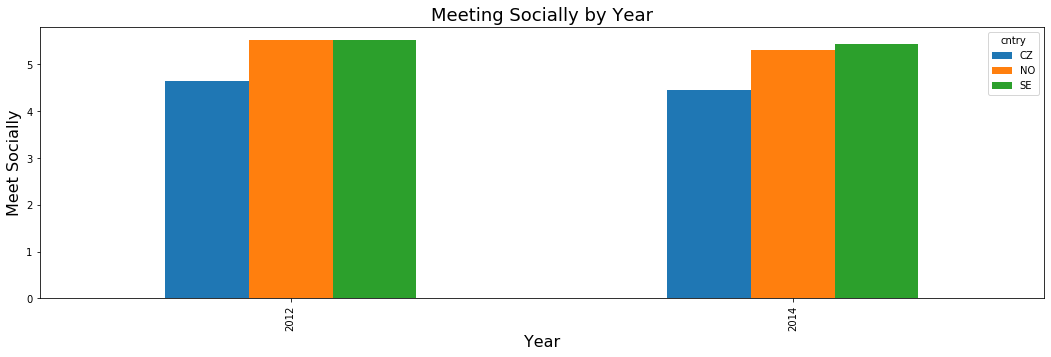

In [12]:
data2.groupby(["Year",'cntry']).sclmeet.mean().unstack().plot(kind="bar", figsize=(18,5))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Meet Socially", fontsize=16)
plt.title("Meeting Socially by Year", fontsize=18)
plt.show()

In 2014 Norway (NO) was slightly less likely to meet socially as they were in 2012. Czech and Sweden seem to stay the same for both years. 

#6 Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

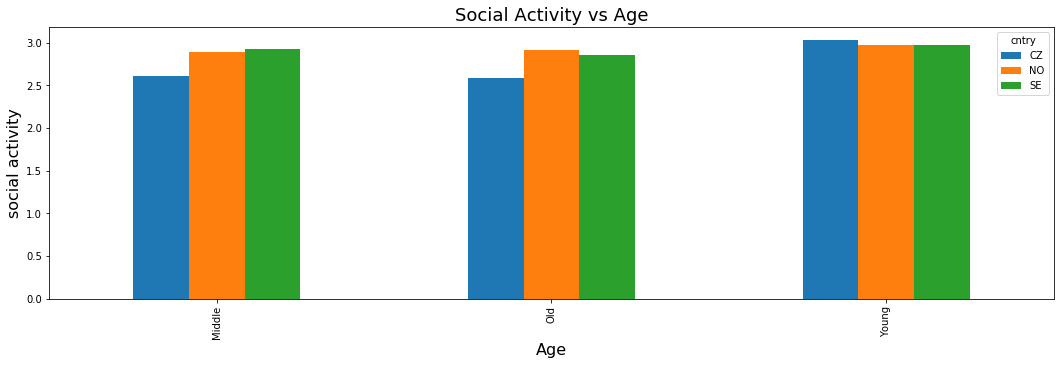

In [20]:
data2.groupby(["Age_bins",'cntry']).sclact.mean().unstack().plot(kind="bar", figsize=(18,5))
plt.xlabel("Age", fontsize=16)
plt.ylabel("social activity", fontsize=16)
plt.title("Social Activity vs Age", fontsize=18)
plt.show()

For all 3 countries the younger population, under 25, took part in more social activities. There is a significant different between the three age groups for Czech (CZ), the younger population partipated significantly more then the middle and older popluation. For Norway (NO) it looks like the middle and young population (50 and younger) participated equally however, the older population(over 50) average more activities then the other two groups. Sweden (SE) seem to be equal amongst the three age groups. 